<a href="https://colab.research.google.com/github/7201krap/PYTHON_applied_data_science/blob/main/apr17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets

# How are we going to use evaluate the performance? 
# 1. accuracy
from sklearn import metrics
# 2. f1 score 
from sklearn.metrics import f1_score

# Machine learning models 

# Linear Regression 
# url : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

# SVM
# url: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm

# KNN 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
# url: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

# Random Forest 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Logistic Classifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

# PCA 
from sklearn.decomposition import PCA 

# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

Here, I use cancer dataset for tutorials.
It can be simply changed to another dataset

## Machine learning algorithms that we are going to use

- SVM

- Random Forest 

- Decision Tree 

- Softmax 

- KNN 

## Preprocess all data
https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

In [2]:
sampled_dep_score = pd.read_csv('sampled_dep_score.csv')

target = sampled_dep_score['dep_score'].copy()

data = sampled_dep_score.copy()
del data['dep_score']

In [3]:
data

,comp_week,comp_wend,text_week,text_wend,tv_week,tv_wend
0,2,2,2,3,2,2
1,2,2,1,1,2,2
2,2,2,3,3,2,2
3,2,3,2,3,1,1
4,2,2,2,2,2,2
...,...,...,...,...,...,...
1199,3,3,2,2,3,3
1200,2,2,2,2,1,2
1201,3,3,3,3,2,2
1202,3,3,1,2,3,3


In [4]:
target

0       2.0
1       4.0
2       2.0
3       1.0
4       1.0
       ... 
1199    2.0
1200    1.0
1201    0.0
1202    0.0
1203    0.0
Name: dep_score, Length: 1204, dtype: float64

## PCA section

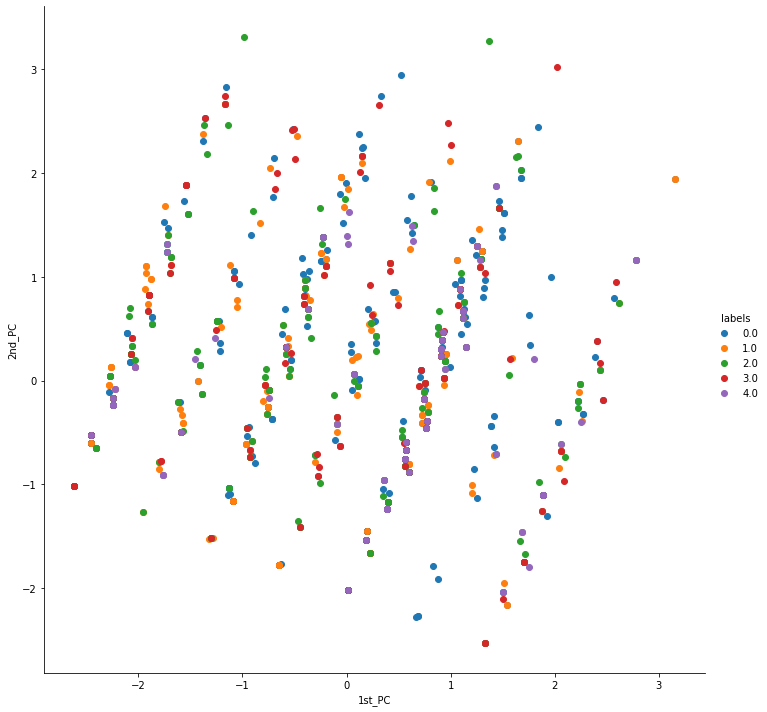

In [5]:
pca = PCA(n_components=2, random_state=1)
pca_data = pca.fit_transform(data)

data_with_labels = np.vstack((pca_data.T, target)).T
pca_df = pd.DataFrame(data=data_with_labels, columns=('1st_PC', '2nd_PC', 'labels'))
sns.FacetGrid(pca_df, hue='labels', height=10).map(plt.scatter, '1st_PC', '2nd_PC').add_legend()
plt.show()

In [6]:
pca_df

,1st_PC,2nd_PC,labels
0,-1.246047,0.570976,2.0
1,0.739467,-0.179220,4.0
2,-1.894940,0.826020,2.0
3,-1.050772,0.778311,1.0
4,-0.577737,0.323400,1.0
...,...,...,...
1199,-1.301724,-1.519308,2.0
1200,-0.367615,0.687361,1.0
1201,-2.243186,-0.235957,0.0
1202,-0.652831,-1.774352,0.0


## Generate Train and Test - Linear Regression

In [7]:
from sklearn.model_selection import train_test_split

X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(pca_data, target, test_size=0.3, random_state=1)  # 70% training and 30% test

## Generate Train and Test - Other Algorithms

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=1)  # 70% training and 30% test

## Linear Regression

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X_pca_train, y_pca_train)

y_pca_pred = lin_reg.predict(X_pca_test)

mse = mean_squared_error(y_pca_test, y_pca_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_pca_test, y_pca_pred)


print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

RMSE value:  1.179867235899997
R2 value:  -0.014095407581567798


## SVM

In [10]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 1)

In [11]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-5, 2, 8),
                        'C': np.logspace(-5, 2, 8),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC(random_state=1)

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [12]:
# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:  1.8min
exception calling callback for <Future at 0x1b627b68220 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "C:\Users\parkj\anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Users\parkj\anaconda3\lib\site-packages\joblib\parallel.py", line 347, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\parkj\anaconda3\lib\site-packages\joblib\parallel.py", line 780, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users\parkj\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\parkj\anaconda3\lib\site-packages

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [ ]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score:", f1_score(y_test, svm_y_pred, average='micro'))

## Logistic Regression

In [ ]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-5, 2, 8),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression(random_state=1)

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [ ]:
# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

In [ ]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score:", f1_score(y_test, log_y_pred, average='micro'))

## KNN

In [ ]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int)
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier(n_neighbors=3)

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [ ]:
# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

In [ ]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score:", f1_score(y_test, knn_y_pred, average='micro'))

## Random Forest

In [ ]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier(random_state=1)

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [ ]:
# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

In [ ]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score:", f1_score(y_test, rf_y_pred, average='micro'))